<a href="https://colab.research.google.com/github/inqubate/tensorflow-practice/blob/master/bike_rental.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [15]:
bike = pd.read_csv('/content/drive/My Drive/Data/bike_sharing_daily.csv')
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt
0,1,1/1/2011,1,0,1,0,6,0,2,0.344167,0.805833,0.160446,331,654,985
1,2,1/2/2011,1,0,1,0,0,0,2,0.363478,0.696087,0.248539,131,670,801
2,3,1/3/2011,1,0,1,0,1,1,1,0.196364,0.437273,0.248309,120,1229,1349
3,4,1/4/2011,1,0,1,0,2,1,1,0.200000,0.590435,0.160296,108,1454,1562
4,5,1/5/2011,1,0,1,0,3,1,1,0.226957,0.436957,0.186900,82,1518,1600


In [16]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  hum         731 non-null    float64
 11  windspeed   731 non-null    float64
 12  casual      731 non-null    int64  
 13  registered  731 non-null    int64  
 14  cnt         731 non-null    int64  
dtypes: float64(3), int64(11), object(1)
memory usage: 85.8+ KB


In [17]:
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.972500,0.507463,3410.000000,6946.000000,8714.000000


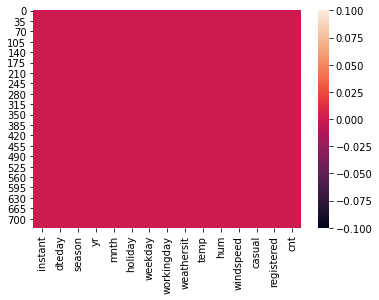

In [18]:
# really cool idea to check all the data once for nulls -
# must check with annotation
sns.heatmap(bike.isnull())

In [19]:
bike = bike.drop(labels=['instant', 'casual', 'registered'], axis=1)

In [20]:
bike.tail()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
726,12/27/2012,1,1,12,0,4,1,2,0.254167,0.652917,0.350133,2114
727,12/28/2012,1,1,12,0,5,1,2,0.253333,0.590000,0.155471,3095
728,12/29/2012,1,1,12,0,6,0,2,0.253333,0.752917,0.124383,1341
729,12/30/2012,1,1,12,0,0,0,1,0.255833,0.483333,0.350754,1796
730,12/31/2012,1,1,12,0,1,1,2,0.215833,0.577500,0.154846,2729


In [22]:
bike.dteday = pd.to_datetime(bike.dteday, format = '%m/%d/%Y')

In [25]:
bike.index = pd.DatetimeIndex(bike.dteday)
bike.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
dteday,,,,,,,,,,,,
2011-01-01,2011-01-01,1,0,1,0,6,0,2,0.344167,0.805833,0.160446,985
2011-01-02,2011-01-02,1,0,1,0,0,0,2,0.363478,0.696087,0.248539,801
2011-01-03,2011-01-03,1,0,1,0,1,1,1,0.196364,0.437273,0.248309,1349
2011-01-04,2011-01-04,1,0,1,0,2,1,1,0.200000,0.590435,0.160296,1562
2011-01-05,2011-01-05,1,0,1,0,3,1,1,0.226957,0.436957,0.186900,1600


In [27]:
bike = bike.drop(labels=['dteday'], axis=1)

KeyError: ignored

In [28]:
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
dteday,,,,,,,,,,,
2011-01-01,1,0,1,0,6,0,2,0.344167,0.805833,0.160446,985
2011-01-02,1,0,1,0,0,0,2,0.363478,0.696087,0.248539,801
2011-01-03,1,0,1,0,1,1,1,0.196364,0.437273,0.248309,1349
2011-01-04,1,0,1,0,2,1,1,0.200000,0.590435,0.160296,1562
2011-01-05,1,0,1,0,3,1,1,0.226957,0.436957,0.186900,1600


Text(0, 0.5, 'Bike Rental')

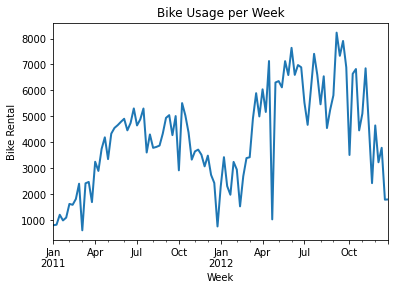

In [31]:
bike['cnt'].asfreq('W').plot(linewidth = 2)
plt.title("Bike Usage per Week")
plt.xlabel("Week")
plt.ylabel("Bike Rental")

Text(0, 0.5, 'Bike Rental')

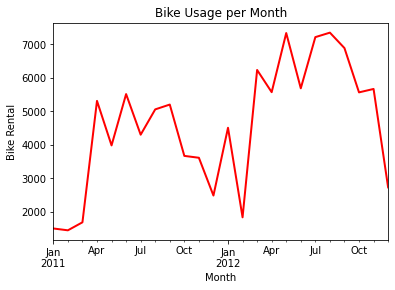

In [33]:
bike['cnt'].asfreq('M').plot(linewidth = 2, color='red')
plt.title("Bike Usage per Month")
plt.xlabel("Month")
plt.ylabel("Bike Rental")

Text(0, 0.5, 'Bike Rental')

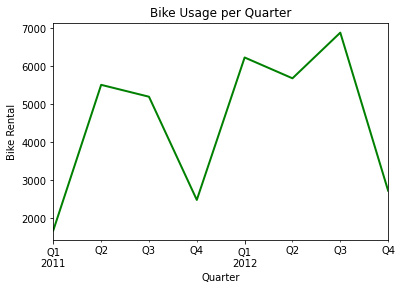

In [35]:
bike['cnt'].asfreq('Q').plot(linewidth = 2, color='green')
plt.title("Bike Usage per Quarter")
plt.xlabel("Quarter")
plt.ylabel("Bike Rental")

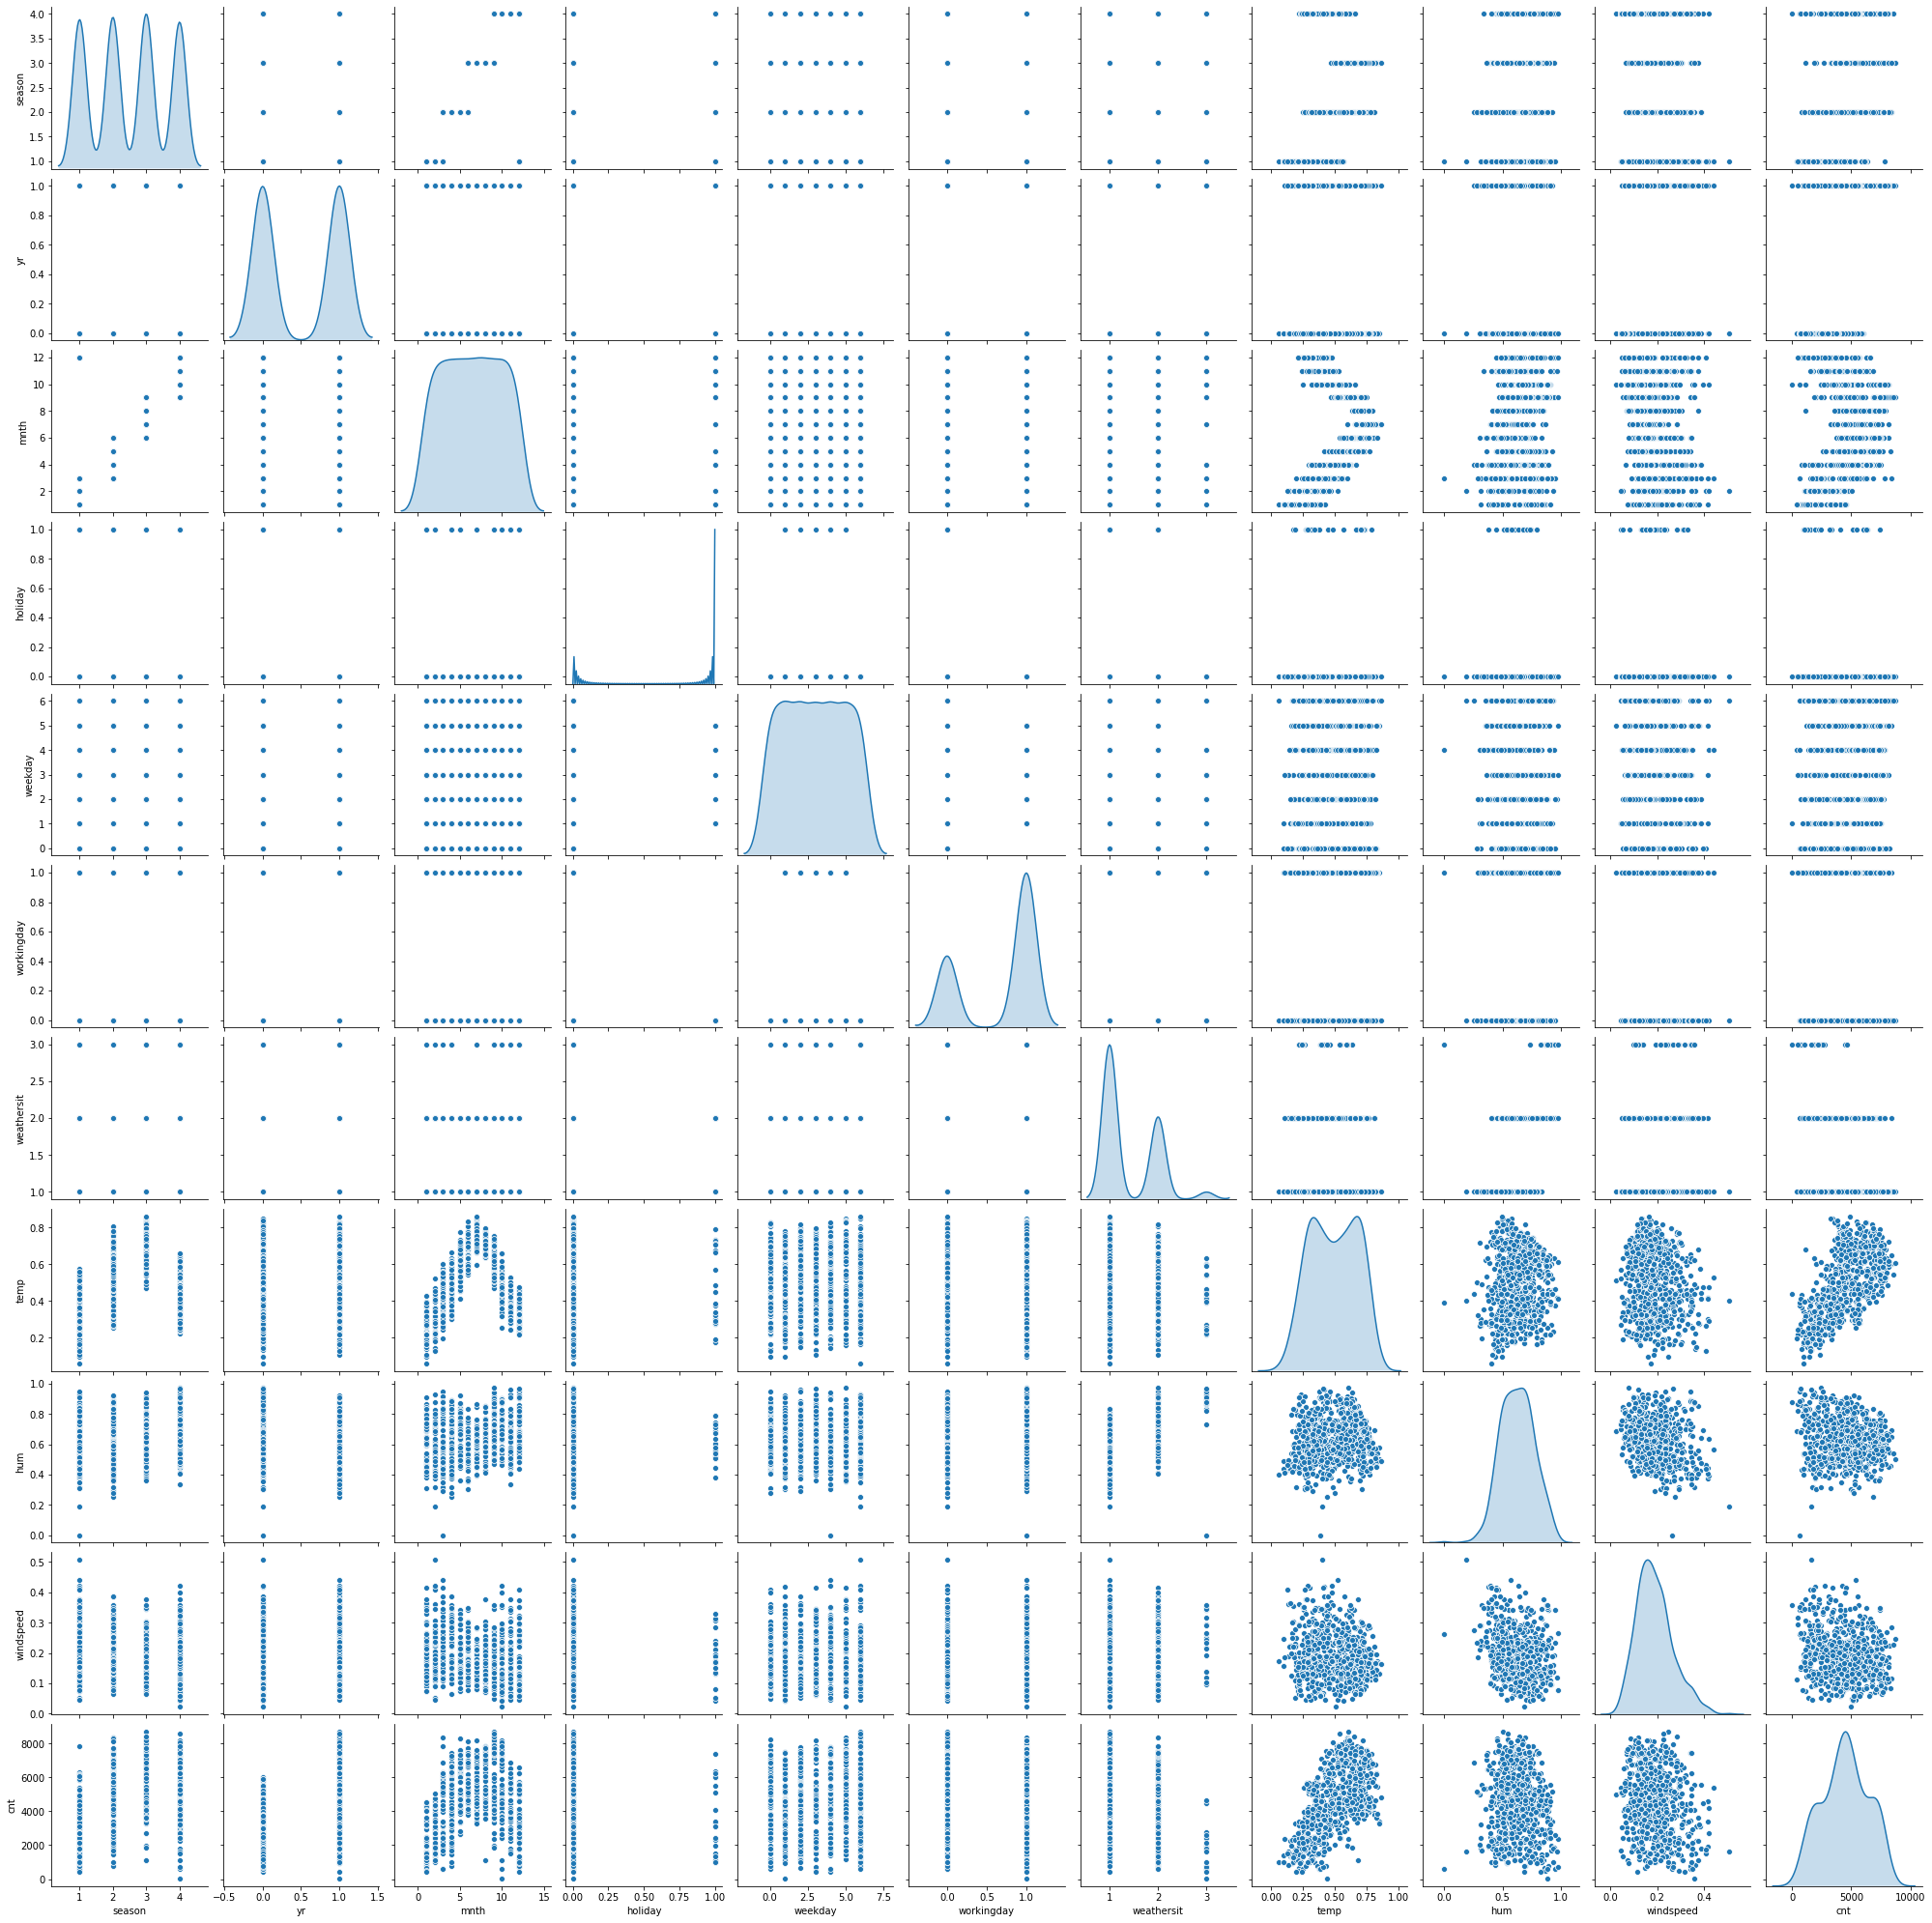

In [36]:
sns.pairplot(bike, diag_kind="kde")

In [37]:
x_num = bike[['temp', 'hum', 'windspeed', 'cnt']]

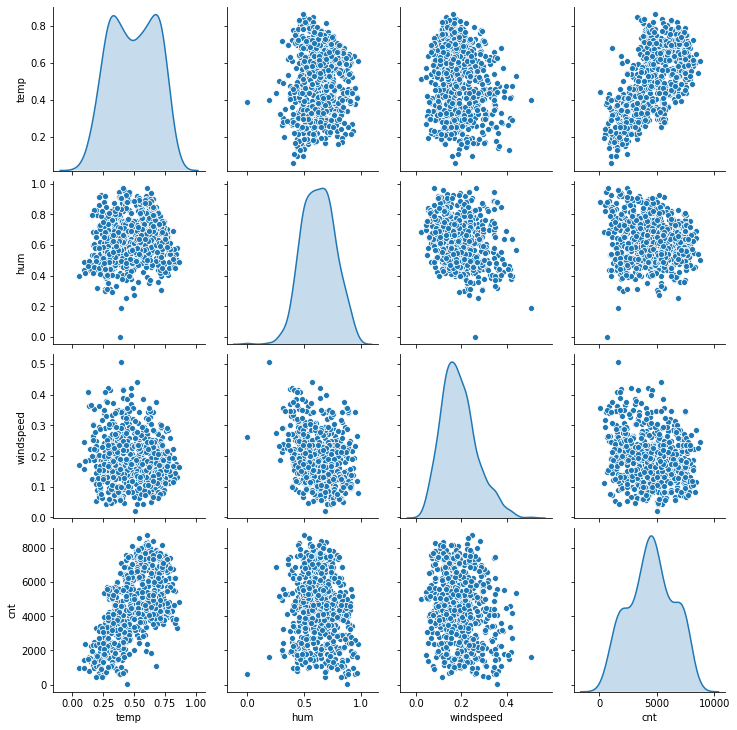

In [38]:
sns.pairplot(x_num, diag_kind="kde")

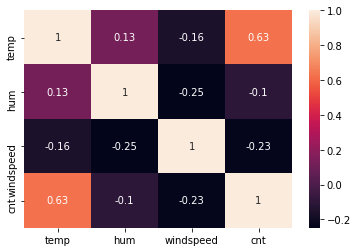

In [39]:
sns.heatmap(x_num.corr(), annot=True)

In [40]:
x_cat = bike[['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']]

In [41]:
from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder()
x_cat = onehotencoder.fit_transform(x_cat).toarray()

In [42]:
x_cat

array([[1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 1., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 0., 1., 0.]])

In [43]:
x_cat.shape

(731, 32)

In [44]:
x_cat = pd.DataFrame(x_cat)

In [45]:
x_num = x_num.reset_index()

In [49]:
x_num = x_num.drop(['dteday'], axis=1)

In [52]:
df = pd.concat([x_cat, x_num], axis=1)

In [53]:
df.head()


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,temp,hum,windspeed,cnt
0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.344167,0.805833,0.160446,985
1,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.363478,0.696087,0.248539,801
2,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.196364,0.437273,0.248309,1349
3,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.200000,0.590435,0.160296,1562
4,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.226957,0.436957,0.186900,1600


In [58]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1:].values


In [59]:
X.shape
y.shape

(731, 1)

In [60]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
y = scaler.fit_transform(y)

In [61]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

print("Train Size ", X_train.shape, y_train.shape)
print("Test Size ", X_test.shape, y_test.shape)

Train Size  (584, 35) (584, 1)
Test Size  (147, 35) (147, 1)


In [81]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=128, activation='relu', input_shape=(35,)))
model.add(tf.keras.layers.Dense(units=128, activation='relu'))
model.add(tf.keras.layers.Dense(units=256, activation='relu'))
model.add(tf.keras.layers.Dense(units=128, activation='relu'))
model.add(tf.keras.layers.Dense(units=128, activation='relu'))
model.add(tf.keras.layers.Dense(units=1, activation='linear'))


In [82]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 128)               4608      
_________________________________________________________________
dense_14 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_15 (Dense)             (None, 256)               33024     
_________________________________________________________________
dense_16 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_17 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_18 (Dense)             (None, 1)                 129       
Total params: 103,681
Trainable params: 103,681
Non-trainable params: 0
________________________________________________

In [83]:
model.compile(optimizer='Adam', loss='mean_squared_error')

In [84]:
epoch_history = model.fit(X_train, y_train, epochs=50, batch_size = 32, validation_split=0.25)

Epoch 1/50
14/14 [==============================] - 0s 17ms/step - loss: 0.0853 - val_loss: 0.0175
Epoch 2/50
14/14 [==============================] - 0s 5ms/step - loss: 0.0137 - val_loss: 0.0109
Epoch 3/50
14/14 [==============================] - 0s 5ms/step - loss: 0.0088 - val_loss: 0.0103
Epoch 4/50
14/14 [==============================] - 0s 4ms/step - loss: 0.0074 - val_loss: 0.0090
Epoch 5/50
14/14 [==============================] - 0s 4ms/step - loss: 0.0057 - val_loss: 0.0089
Epoch 6/50
14/14 [==============================] - 0s 4ms/step - loss: 0.0049 - val_loss: 0.0092
Epoch 7/50
14/14 [==============================] - 0s 4ms/step - loss: 0.0041 - val_loss: 0.0106
Epoch 8/50
14/14 [==============================] - 0s 4ms/step - loss: 0.0038 - val_loss: 0.0095
Epoch 9/50
14/14 [==============================] - 0s 3ms/step - loss: 0.0034 - val_loss: 0.0095
Epoch 10/50
14/14 [==============================] - 0s 4ms/step - loss: 0.0034 - val_loss: 0.0104
Epoch 11/50
14/14 

In [85]:
epoch_history.history.keys()

dict_keys(['loss', 'val_loss'])

Text(0, 0.5, 'Training and Validation Loss')

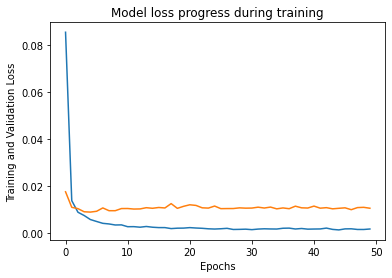

In [86]:
plt.plot(epoch_history.history['loss'])
plt.plot(epoch_history.history['val_loss'])
plt.title('Model loss progress during training')
plt.xlabel("Epochs")
plt.ylabel("Training and Validation Loss")

In [87]:
y_pred = model.predict(X_test)

Text(0, 0.5, 'True Values')

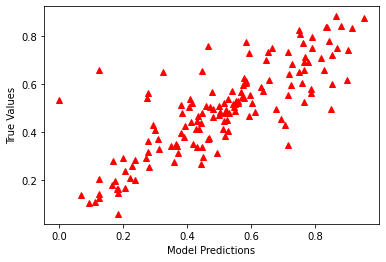

In [88]:
plt.plot(y_test, y_pred, '^', color='red')
plt.xlabel('Model Predictions')
plt.ylabel('True Values')

In [91]:
y_pred_orig = scaler.inverse_transform(y_pred)
y_test_orig = scaler.inverse_transform(y_test)

Text(0, 0.5, 'True Values')

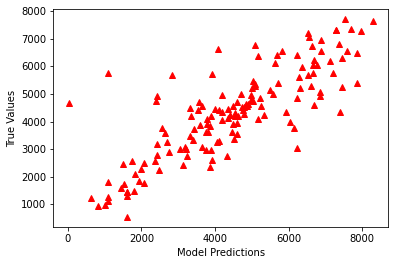

In [92]:
plt.plot(y_test_orig, y_pred_orig, '^', color='red')
plt.xlabel('Model Predictions')
plt.ylabel('True Values')

In [93]:
k = X_test.shape[1]
k

35

In [96]:
n = len(X_test)

In [95]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

RMSE = float(format(np.sqrt(mean_squared_error(y_test_orig, y_pred_orig)), '0.3f'))
RMSE

1120.617

In [97]:
MSE = mean_squared_error(y_test_orig, y_pred_orig)
MAE = mean_absolute_error(y_test_orig, y_pred_orig)
r2 = r2_score(y_test_orig, y_pred_orig)
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - k - 1)

In [98]:
print("RMSE = ", RMSE, "\nMSE = ", MSE, "\nMAE = ", MAE, "\nR2 Score = ", r2, "\nAdjusted R2 = ", adj_r2)

RMSE =  1120.617 
MSE =  1255782.6581994176 
MAE =  765.8874283355921 
R2 Score =  0.6526889697944446 
Adjusted R2 =  0.5431764827926928
